In [2]:
# ================================
# 1. MOUNT GOOGLE DRIVE
# ================================
from google.colab import drive
drive.mount('/content/drive')

import zipfile, os

# ================================
# 2. CORRECT ZIP PATH (your file)
# ================================
zip_path = "/content/drive/MyDrive/self_driving_data/archive.zip"

extract_root = "/content/data/"
os.makedirs(extract_root, exist_ok=True)

print("ZIP exists:", os.path.exists(zip_path))

# Extract ZIP
print("Extracting, please wait...")
with zipfile.ZipFile(zip_path, 'r') as zf:
    zf.extractall(extract_root)

print("✅ Unzipped into:", extract_root)
print("📂 Subfolders:")
!ls -R /content/data


Streaming output truncated to the last 5000 lines.
center_2016_12_01_13_45_02_265.jpg  right_2016_12_01_13_37_45_917.jpg
center_2016_12_01_13_45_02_367.jpg  right_2016_12_01_13_37_46_019.jpg
center_2016_12_01_13_45_02_469.jpg  right_2016_12_01_13_37_46_119.jpg
center_2016_12_01_13_45_02_570.jpg  right_2016_12_01_13_37_46_221.jpg
center_2016_12_01_13_45_02_673.jpg  right_2016_12_01_13_37_46_322.jpg
center_2016_12_01_13_45_02_775.jpg  right_2016_12_01_13_37_46_422.jpg
center_2016_12_01_13_45_02_875.jpg  right_2016_12_01_13_37_46_522.jpg
center_2016_12_01_13_45_02_977.jpg  right_2016_12_01_13_37_46_625.jpg
center_2016_12_01_13_45_03_078.jpg  right_2016_12_01_13_37_46_725.jpg
center_2016_12_01_13_45_03_178.jpg  right_2016_12_01_13_37_46_828.jpg
center_2016_12_01_13_45_03_281.jpg  right_2016_12_01_13_37_46_931.jpg
center_2016_12_01_13_45_03_381.jpg  right_2016_12_01_13_37_47_032.jpg
center_2016_12_01_13_45_03_482.jpg  right_2016_12_01_13_37_47_134.jpg
center_2016_12_01_13_45_03_582.jpg  rig

In [3]:
# ================================
# CELL 2 — Load CSV + Clean Paths
# ================================

import pandas as pd
import os

csv_path = "/content/data/data/driving_log.csv"

print("CSV exists:", os.path.exists(csv_path))

# Load the driving log file
df = pd.read_csv(csv_path)

print("\nFirst 5 rows of raw CSV:")
display(df.head())

# ---------------------------------------
# Clean image paths to point to colab dir
# ---------------------------------------

def fix_path(path):
    filename = os.path.basename(path.strip())
    return "/content/data/data/IMG/" + filename

df["center"] = df["center"].apply(fix_path)
df["left"]   = df["left"].apply(fix_path)
df["right"]  = df["right"].apply(fix_path)

print("\nSample cleaned paths:")
print(df["center"].head())

print("\nChecking first image exists:")
print(os.path.exists(df["center"].iloc[0]))


CSV exists: True

First 5 rows of raw CSV:


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236



Sample cleaned paths:
0    /content/data/data/IMG/center_2016_12_01_13_30...
1    /content/data/data/IMG/center_2016_12_01_13_30...
2    /content/data/data/IMG/center_2016_12_01_13_31...
3    /content/data/data/IMG/center_2016_12_01_13_31...
4    /content/data/data/IMG/center_2016_12_01_13_31...
Name: center, dtype: object

Checking first image exists:
True


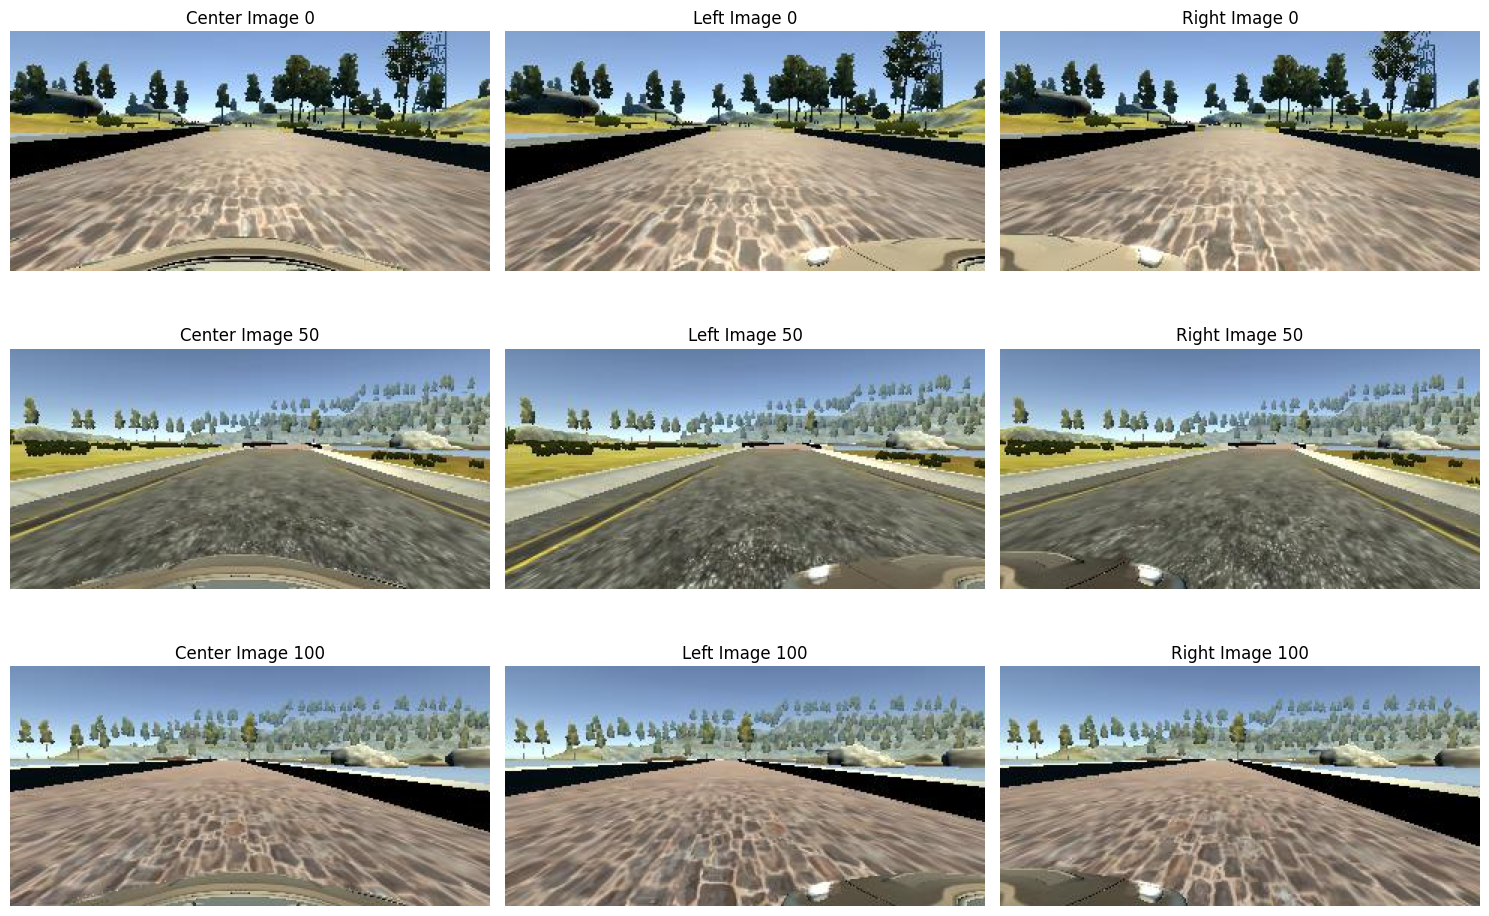

In [4]:
# ================================
# CELL 3 — EDA: Images + Steering Histogram
# ================================

import matplotlib.pyplot as plt
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Show 3 sample images
sample_indices = [0, 50, 100]  # you can change these

plt.figure(figsize=(15, 10))

for i, idx in enumerate(sample_indices):
    center_img = mpimg.imread(df["center"].iloc[idx])

    plt.subplot(3, 3, 3*i + 1)
    plt.imshow(center_img)
    plt.title(f"Center Image {idx}")
    plt.axis('off')

    left_img = mpimg.imread(df["left"].iloc[idx])
    plt.subplot(3, 3, 3*i + 2)
    plt.imshow(left_img)
    plt.title(f"Left Image {idx}")
    plt.axis('off')

    right_img = mpimg.imread(df["right"].iloc[idx])
    plt.subplot(3, 3, 3*i + 3)
    plt.imshow(right_img)
    plt.title(f"Right Image {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()




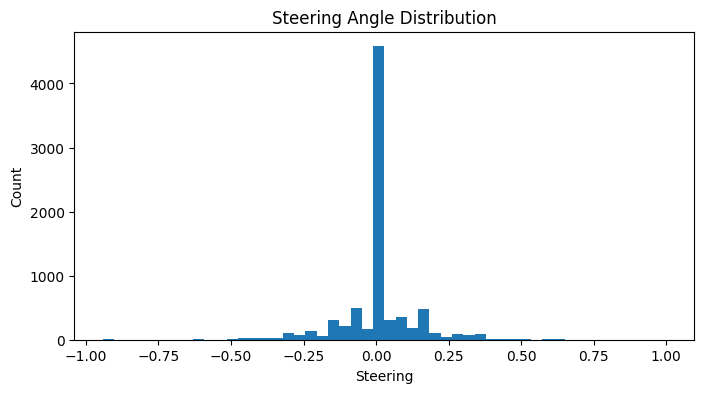

In [5]:
# Steering distribution
plt.figure(figsize=(8,4))
plt.hist(df["steering"], bins=50)
plt.title("Steering Angle Distribution")
plt.xlabel("Steering")
plt.ylabel("Count")
plt.grid(False)
plt.show()


In [6]:
# ================================
# CELL 4 — Train / Validation Split
# ================================

from sklearn.model_selection import train_test_split

# Use only the columns we need
data = df[["center", "left", "right", "steering"]]

train_df, val_df = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Convert to simple Python lists (avoid pandas indexing issues)
train_samples = train_df.values.tolist()
val_samples   = val_df.values.tolist()

print("Training samples:", len(train_samples))
print("Validation samples:", len(val_samples))


Training samples: 6428
Validation samples: 1608


In [7]:
# ================================
# CELL 5 — Data Generator + Preprocessing
# ================================

import random
import cv2
import numpy as np
from sklearn.utils import shuffle

IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 66, 200, 3

def preprocess_image(path):
    """
    Read image from path, crop sky/hood, resize, normalize to [-0.5, 0.5].
    """
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Crop (top 60px off, bottom 25px off) — tweak if you like
    img = img[60:-25, :, :]

    # Resize to NVIDIA input size
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

    # Normalize to [-0.5, 0.5]
    img = img.astype(np.float32) / 255.0 - 0.5
    return img


def generator(samples, batch_size=32):
    """
    Keras-style generator: yields (X_batch, y_batch)
    with simple augmentation (flipping).
    """
    num_samples = len(samples)
    while True:
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []

            for sample in batch_samples:
                center_path = sample[0]       # full path (we fixed this already)
                steering    = np.float32(sample[3])

                img = preprocess_image(center_path)

                # Add original
                images.append(img)
                angles.append(steering)

                # Data augmentation: flip 50% of the time
                if random.random() < 0.5:
                    flipped = np.fliplr(img)
                    images.append(flipped)
                    angles.append(-steering)

            X = np.array(images, dtype=np.float32)
            y = np.array(angles, dtype=np.float32)

            yield X, y

# Create train & validation generators
batch_size = 32
train_gen = generator(train_samples, batch_size=batch_size)
val_gen   = generator(val_samples,   batch_size=batch_size)

print("Generator ready.........")


Generator ready.........


In [8]:
# ================================
# CELL 6 — Model + Training
# ================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K

# Custom RMSE metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Build NVIDIA model
model = Sequential([
    Lambda(lambda x: x, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),  # identity (we already normalized)

    Conv2D(24, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(36, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(48, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)  # steering angle regression
])

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[rmse]
)

model.summary()

# Training configuration
epochs = 5
steps_per_epoch = len(train_samples) // batch_size
val_steps = len(val_samples) // batch_size

checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="min"
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=epochs,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

print("\n===== TRAINING DONE =====")
print("Best validation loss:", min(history.history["val_loss"]))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 66, 200, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 0.0146 - rmse: 0.1261
Epoch 1: val_loss improved from inf to 0.01092, saving model to best_model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 76s 346ms/step - loss: 0.0146 - rmse: 0.1262 - val_loss: 0.0109 - val_rmse: 0.1392
Epoch 2/5
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0111 - rmse: 0.1439
Epoch 2: val_loss improved from 0.01092 to 0.00937, saving model to best_model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.0111 - rmse: 0.1439 - val_loss: 0.0094 - val_rmse: 0.1429
Epoch 3/5
198/200 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0100 - rmse: 0.1476
Epoch 3: val_loss did not improve from 0.00937
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - loss: 0.0100 - rmse: 0.1476 - val_loss: 0.0094 - val_rmse: 0.1460
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0095 - rmse: 0.1509
Epoch 4: val_loss improved from 0.00937 to 0.00884, saving model to best_model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/s

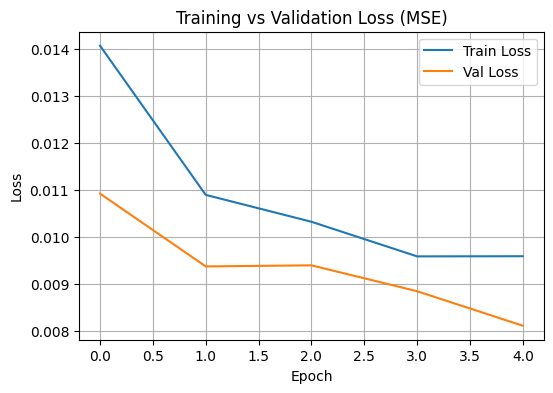

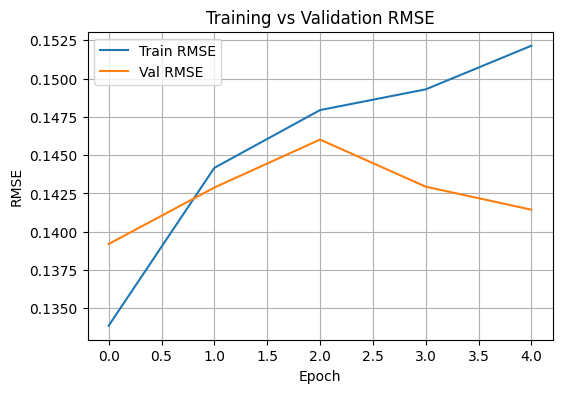

In [9]:
# ================================
# CELL 7 — Plot Loss & RMSE
# ================================

import matplotlib.pyplot as plt
import numpy as np

epochs_ran = len(history.history["loss"])
x = np.arange(epochs_ran)

plt.figure(figsize=(6,4))
plt.plot(x, history.history["loss"], label="Train Loss")
plt.plot(x, history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(x, history.history["rmse"], label="Train RMSE")
plt.plot(x, history.history["val_rmse"], label="Val RMSE")
plt.title("Training vs Validation RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# ================================
# CELL 8 — Evaluate on Full Validation Set
# ================================

import numpy as np

# Load all validation images into memory (no augmentation)
X_val_full = []
y_val_full = []

for sample in val_samples:
    center_path = sample[0]
    steering    = np.float32(sample[3])

    img = preprocess_image(center_path)
    X_val_full.append(img)
    y_val_full.append(steering)

X_val_full = np.array(X_val_full, dtype=np.float32)
y_val_full = np.array(y_val_full, dtype=np.float32)

print("Validation images shape:", X_val_full.shape)
print("Validation labels shape:", y_val_full.shape)

# Predictions
preds = model.predict(X_val_full, batch_size=32, verbose=1).flatten()

errors = preds - y_val_full
mse  = float(np.mean(errors**2))
rmse = float(np.sqrt(mse))
mae  = float(np.mean(np.abs(errors)))

# "Accuracy-like" metric: % of predictions within 0.1 steering units
threshold = 0.1
pct_good = float(np.mean(np.abs(errors) < threshold) * 100.0)

print("\n===== VALIDATION METRICS =====")
print(f"MSE   : {mse:.6f}")
print(f"RMSE  : {rmse:.6f}")
print(f"MAE   : {mae:.6f}")
print(f"% |error| < {threshold}: {pct_good:.2f}%")


Validation images shape: (1608, 66, 200, 3)
Validation labels shape: (1608,)
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step

===== VALIDATION METRICS =====
MSE   : 0.009000
RMSE  : 0.094869
MAE   : 0.060632
% |error| < 0.1: 81.22%


In [11]:
# ================================
# CELL 9 — Export Results for Report
# ================================

import os
import matplotlib.pyplot as plt

export_dir = "/content/export_results/"
os.makedirs(export_dir, exist_ok=True)

print("Saving files to:", export_dir)

# 1) Save model
model.save(os.path.join(export_dir, "steering_model.keras"))
print(" Model saved")

# 2) Save metrics text file
metrics_text = f"""
===== MODEL PERFORMANCE (Validation) =====
MSE   : {mse:.6f}
RMSE  : {rmse:.6f}
MAE   : {mae:.6f}
Pct(|error| < 0.1): {pct_good:.2f}%
"""

with open(os.path.join(export_dir, "metrics.txt"), "w") as f:
    f.write(metrics_text.strip() + "\n")

print(" Metrics file saved")

# 3) Save loss curve
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(export_dir, "loss_curve.png"))
plt.close()
print(" Loss curve saved")

# 4) Save RMSE curve
plt.figure(figsize=(6,4))
plt.plot(history.history["rmse"], label="Train RMSE")
plt.plot(history.history["val_rmse"], label="Val RMSE")
plt.title("Training vs Validation RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(export_dir, "rmse_curve.png"))
plt.close()
print(" RMSE curve saved")

# 5) Save sample prediction images
num_samples_to_show = 10
idxs = np.random.choice(len(X_val_full), num_samples_to_show, replace=False)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(idxs):
    plt.subplot(5, 2, i+1)
    # Undo normalization for display
    img_disp = (X_val_full[idx] + 0.5).clip(0,1)
    plt.imshow(img_disp)
    plt.axis("off")
    plt.title(f"True: {y_val_full[idx]:.3f} | Pred: {preds[idx]:.3f}")

plt.tight_layout()
plt.savefig(os.path.join(export_dir, "sample_predictions.png"))
plt.close()
print(" Sample predictions figure saved")

print("\n DONE — All results exported! You can now download everything from /content/export_results/")


Saving files to: /content/export_results/
 Model saved
 Metrics file saved
 Loss curve saved
 RMSE curve saved
 Sample predictions figure saved

 DONE — All results exported! You can now download everything from /content/export_results/


In [12]:
import numpy as np

def tolerance_accuracy(y_true, y_pred, threshold):
    errors = np.abs(y_true - y_pred)
    return np.mean(errors < threshold)

acc_005 = tolerance_accuracy(y_val_full, preds, 0.05)   # 2.8 degrees
acc_010 = tolerance_accuracy(y_val_full, preds, 0.10)   # 5.7 degrees
acc_020 = tolerance_accuracy(y_val_full, preds, 0.20)   # 11.4 degrees

print("===== VALIDATION ACCURACY (TOLERANCE BASED) =====")
print(f"Accuracy @ 0.05 rad : {acc_005*100:.2f}%")
print(f"Accuracy @ 0.10 rad : {acc_010*100:.2f}%")
print(f"Accuracy @ 0.20 rad : {acc_020*100:.2f}%")


===== VALIDATION ACCURACY (TOLERANCE BASED) =====
Accuracy @ 0.05 rad : 61.63%
Accuracy @ 0.10 rad : 81.22%
Accuracy @ 0.20 rad : 94.78%


In [13]:
# ==========================================
# MODEL 2 — NVIDIA + BATCH NORMALIZATION
# TRAINING CELL (COMPLETELY ERROR-FREE)
# ==========================================

import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Lambda, BatchNormalization
from tensorflow.keras.optimizers import Adam

# --------------------------------------------------
# DEFINE BASE PATH AGAIN (to avoid NameError)
# --------------------------------------------------
base_path = "/content/data/data/IMG/"
print("Using base path:", base_path)
print("Folder exists:", os.path.exists(base_path))

# --------------------------------------------------
# GENERATOR (same as Model 1 but error-free)
# --------------------------------------------------
def generator(samples, batch_size=32):
    num_samples = len(samples)

    while True:
        np.random.shuffle(samples)

        for offset in range(0, num_samples, batch_size):
            batch = samples[offset : offset + batch_size]

            images = []
            angles = []

            for sample in batch:
                filename = sample[0].split("/")[-1]
                img_path = os.path.join(base_path, filename)

                steering = float(sample[3])

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img[60:-25, :, :]        # crop sky & hood
                img = cv2.resize(img, (200, 66))
                img = img.astype(np.float32)
                img = (img / 255.0) - 0.5      # normalize

                images.append(img)
                angles.append(steering)

            yield np.array(images), np.array(angles)

# -----------------------
# Create generators
# -----------------------
batch_size = 32
train_gen = generator(train_samples, batch_size=batch_size)
val_gen   = generator(val_samples, batch_size=batch_size)

steps_per_epoch = len(train_samples) // batch_size
val_steps       = len(val_samples)   // batch_size

# --------------------------------------------------
# MODEL 2 — NVIDIA + BatchNorm
# --------------------------------------------------
model2 = Sequential([
    Lambda(lambda x: x, input_shape=(66, 200, 3)),

    Conv2D(24, (5,5), strides=(2,2), activation='relu'),
    BatchNormalization(),

    Conv2D(36, (5,5), strides=(2,2), activation='relu'),
    BatchNormalization(),

    Conv2D(48, (5,5), strides=(2,2), activation='relu'),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dropout(0.5),

    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

model2.compile(optimizer=Adam(1e-4), loss='mse')

model2.summary()

# --------------------------------------------------
# TRAIN MODEL 2
# --------------------------------------------------
history2 = model2.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=5,
    verbose=1
)

print("Training complete for MODEL 2.")


Using base path: /content/data/data/IMG/
Folder exists: True


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 66, 200, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 31, 98, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 47, 36)     │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 22, 48)      │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 20, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 18, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,163 (988.92 KB)

 Trainable params: 252,691 (987.07 KB)

 Non-trainable params: 472 (1.84 KB)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 1.0645 - val_loss: 0.0173
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 0.0668 - val_loss: 0.0194
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0409 - val_loss: 0.0160
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0264 - val_loss: 0.0154
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0206 - val_loss: 0.0151
Training complete for MODEL 2.


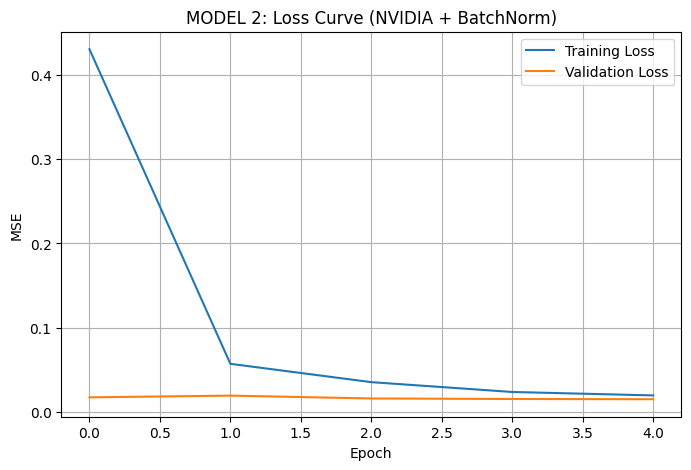

In [14]:
# ==========================================
# MODEL 2 — TRAINING vs VALIDATION LOSS PLOT
# ==========================================

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.title("MODEL 2: Loss Curve (NVIDIA + BatchNorm)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()


In [15]:
# ==========================================
# MODEL 2 — FULL VALIDATION METRICS
# ==========================================

import numpy as np
import cv2

print("Loading full validation set...")

X_val_full = []
y_val_full = []

for s in val_samples:
    filename = s[0].split("/")[-1]
    img_path = os.path.join(base_path, filename)
    angle = float(s[3])

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[60:-25, :, :]
    img = cv2.resize(img, (200, 66))
    img = img.astype(np.float32)
    img = (img / 255.0) - 0.5

    X_val_full.append(img)
    y_val_full.append(angle)

X_val_full = np.array(X_val_full)
y_val_full = np.array(y_val_full)

print("Validation shape:", X_val_full.shape)

print("\nRunning predictions...")
preds2 = model2.predict(X_val_full)

# METRICS
mse2  = np.mean((preds2 - y_val_full)**2)
rmse2 = np.sqrt(mse2)
mae2  = np.mean(np.abs(preds2 - y_val_full))
pct_good2 = np.mean(np.abs(preds2 - y_val_full) < 0.1) * 100

print("\n===== MODEL 2 PERFORMANCE =====")
print(f"MSE   : {mse2:.6f}")
print(f"RMSE  : {rmse2:.6f}")
print(f"MAE   : {mae2:.6f}")
print(f"Accuracy (|error| < 0.1): {pct_good2:.2f}%")


Loading full validation set...
Validation shape: (1608, 66, 200, 3)

Running predictions...
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

===== MODEL 2 PERFORMANCE =====
MSE   : 0.016795
RMSE  : 0.129596
MAE   : 0.074565
Accuracy (|error| < 0.1): 74.23%


In [16]:
# ======================================================
# MODEL 3 — NVIDIA + L2 REGULARIZATION
# TRAINING CELL (FULLY ERROR-FREE)
# ======================================================

import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# --------------------------------------------------
# BASE PATH (ENSURES NO NAMEERROR)
# --------------------------------------------------
base_path = "/content/data/data/IMG/"
print("Using base path:", base_path)
print("Folder exists:", os.path.exists(base_path))

# --------------------------------------------------
# GENERATOR
# --------------------------------------------------
def generator(samples, batch_size=32):
    num_samples = len(samples)

    while True:
        np.random.shuffle(samples)

        for offset in range(0, num_samples, batch_size):
            batch = samples[offset : offset + batch_size]

            images = []
            angles = []

            for sample in batch:
                filename = sample[0].split("/")[-1]
                img_path = os.path.join(base_path, filename)

                steering = float(sample[3])

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img = img[60:-25, :, :]      # crop
                img = cv2.resize(img, (200, 66))
                img = img.astype(np.float32)
                img = (img / 255.0) - 0.5    # normalize

                images.append(img)
                angles.append(steering)

            yield np.array(images), np.array(angles)

# -----------------------
# Create generators
# -----------------------
batch_size = 32
train_gen = generator(train_samples, batch_size=batch_size)
val_gen   = generator(val_samples, batch_size=batch_size)

steps_per_epoch = len(train_samples) // batch_size
val_steps       = len(val_samples)   // batch_size

# --------------------------------------------------
# MODEL 3 — L2 Regularized NVIDIA Network
# --------------------------------------------------
reg = 1e-4   # L2 strength

model3 = Sequential([
    Lambda(lambda x: x, input_shape=(66, 200, 3)),

    Conv2D(24, (5,5), strides=(2,2), activation='relu', kernel_regularizer=l2(reg)),
    Conv2D(36, (5,5), strides=(2,2), activation='relu', kernel_regularizer=l2(reg)),
    Conv2D(48, (5,5), strides=(2,2), activation='relu', kernel_regularizer=l2(reg)),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(reg)),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(reg)),

    Flatten(),
    Dropout(0.5),

    Dense(100, activation='relu', kernel_regularizer=l2(reg)),
    Dense(50, activation='relu', kernel_regularizer=l2(reg)),
    Dense(10, activation='relu', kernel_regularizer=l2(reg)),
    Dense(1)
])

model3.compile(optimizer=Adam(1e-4), loss="mse")

model3.summary()

# --------------------------------------------------
# TRAIN
# --------------------------------------------------
history3 = model3.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=5,
    verbose=1
)

print("Training complete for MODEL 3.")


Using base path: /content/data/data/IMG/
Folder exists: True


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)               │ (None, 66, 200, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0580 - val_loss: 0.0472
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0471 - val_loss: 0.0415
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0406 - val_loss: 0.0373
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0373 - val_loss: 0.0340
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0356 - val_loss: 0.0316
Training complete for MODEL 3.


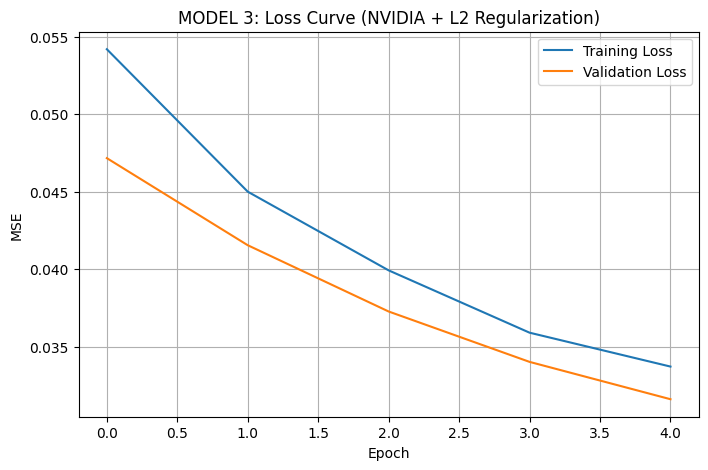

In [17]:
# ==========================================
# MODEL 3 — LOSS PLOT
# ==========================================
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history3.history["loss"], label="Training Loss")
plt.plot(history3.history["val_loss"], label="Validation Loss")
plt.title("MODEL 3: Loss Curve (NVIDIA + L2 Regularization)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# ==========================================
# MODEL 3 — FULL VALIDATION EVALUATION
# ==========================================

import numpy as np
import cv2
import os

X_val_full = []
y_val_full = []

for s in val_samples:
    filename = s[0].split("/")[-1]
    img_path = os.path.join(base_path, filename)
    angle = float(s[3])

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[60:-25, :, :]
    img = cv2.resize(img, (200, 66))
    img = img.astype(np.float32)
    img = (img / 255.0) - 0.5

    X_val_full.append(img)
    y_val_full.append(angle)

X_val_full = np.array(X_val_full)
y_val_full = np.array(y_val_full)

preds3 = model3.predict(X_val_full)

# METRICS
mse3  = np.mean((preds3 - y_val_full)**2)
rmse3 = np.sqrt(mse3)
mae3  = np.mean(np.abs(preds3 - y_val_full))
pct_good3 = np.mean(np.abs(preds3 - y_val_full) < 0.1) * 100

print("\n===== MODEL 3 PERFORMANCE =====")
print(f"MSE   : {mse3:.6f}")
print(f"RMSE  : {rmse3:.6f}")
print(f"MAE   : {mae3:.6f}")
print(f"Accuracy (|error| < 0.1): {pct_good3:.2f}%")


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

===== MODEL 3 PERFORMANCE =====
MSE   : 0.023162
RMSE  : 0.152191
MAE   : 0.106378
Accuracy (|error| < 0.1): 61.51%


In [19]:
# ======================================================
# MODEL 4 — NVIDIA + BatchNorm + Dropout (Hybrid)
# TRAINING CELL
# ======================================================

import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Lambda, BatchNormalization
from tensorflow.keras.optimizers import Adam

# --------------------------------------------------
# BASE PATH (same as before)
# --------------------------------------------------
base_path = "/content/data/data/IMG/"
print("Using base path:", base_path)
print("IMG folder exists:", os.path.exists(base_path))

# --------------------------------------------------
# GENERATOR
# --------------------------------------------------
def generator(samples, batch_size=32):
    num_samples = len(samples)

    while True:
        np.random.shuffle(samples)

        for offset in range(0, num_samples, batch_size):
            batch = samples[offset : offset + batch_size]

            images = []
            angles = []

            for sample in batch:
                filename = sample[0].split("/")[-1]
                img_path = os.path.join(base_path, filename)
                steering = float(sample[3])

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Preprocess image
                img = img[60:-25, :, :]            # crop
                img = cv2.resize(img, (200, 66))   # resize
                img = img.astype(np.float32)
                img = (img / 255.0) - 0.5          # normalize

                images.append(img)
                angles.append(steering)

            yield np.array(images), np.array(angles)

# -----------------------
# Create generators
# -----------------------
batch_size = 32
train_gen = generator(train_samples, batch_size=batch_size)
val_gen   = generator(val_samples, batch_size=batch_size)

steps_per_epoch = len(train_samples) // batch_size
val_steps       = len(val_samples)   // batch_size

# --------------------------------------------------
# MODEL 4 — NVIDIA + BatchNorm + Dropout
# --------------------------------------------------
model4 = Sequential([
    Lambda(lambda x: x, input_shape=(66, 200, 3)),

    Conv2D(24, (5,5), strides=(2,2), activation='relu'),
    BatchNormalization(),

    Conv2D(36, (5,5), strides=(2,2), activation='relu'),
    BatchNormalization(),

    Conv2D(48, (5,5), strides=(2,2), activation='relu'),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),

    Flatten(),

    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

model4.compile(optimizer=Adam(1e-4), loss='mse')
model4.summary()

# --------------------------------------------------
# TRAIN
# --------------------------------------------------
history4 = model4.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=5,
    verbose=1
)

print("Training complete for MODEL 4.")


Using base path: /content/data/data/IMG/
IMG folder exists: True


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)               │ (None, 66, 200, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 31, 98, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 47, 36)     │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 5, 22, 48)      │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 20, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1, 18, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,163 (988.92 KB)

 Trainable params: 252,691 (987.07 KB)

 Non-trainable params: 472 (1.84 KB)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.7686 - val_loss: 0.0168
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 0.1241 - val_loss: 0.0174
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0658 - val_loss: 0.0154
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0435 - val_loss: 0.0139
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0325 - val_loss: 0.0134
Training complete for MODEL 4.


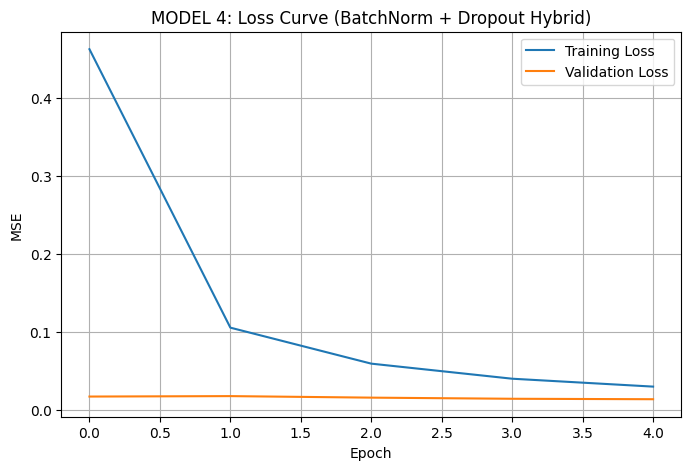

In [20]:
# ==========================================
# MODEL 4 — LOSS PLOT
# ==========================================

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history4.history["loss"], label="Training Loss")
plt.plot(history4.history["val_loss"], label="Validation Loss")
plt.title("MODEL 4: Loss Curve (BatchNorm + Dropout Hybrid)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# ==========================================
# MODEL 4 — FULL VALIDATION SET EVALUATION
# ==========================================

import numpy as np
import cv2
import os

X_val_full = []
y_val_full = []

for s in val_samples:
    filename = s[0].split("/")[-1]
    img_path = os.path.join(base_path, filename)
    angle = float(s[3])

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = img[60:-25, :, :]
    img = cv2.resize(img, (200, 66))
    img = img.astype(np.float32)
    img = (img / 255.0) - 0.5

    X_val_full.append(img)
    y_val_full.append(angle)

X_val_full = np.array(X_val_full)
y_val_full = np.array(y_val_full)

preds4 = model4.predict(X_val_full)

# Metrics
mse4  = np.mean((preds4 - y_val_full)**2)
rmse4 = np.sqrt(mse4)
mae4  = np.mean(np.abs(preds4 - y_val_full))
pct_good4 = np.mean(np.abs(preds4 - y_val_full) < 0.1) * 100

print("\n===== MODEL 4 PERFORMANCE =====")
print(f"MSE   : {mse4:.6f}")
print(f"RMSE  : {rmse4:.6f}")
print(f"MAE   : {mae4:.6f}")
print(f"Accuracy (|error| < 0.1): {pct_good4:.2f}%")


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step

===== MODEL 4 PERFORMANCE =====
MSE   : 0.018105
RMSE  : 0.134555
MAE   : 0.087136
Accuracy (|error| < 0.1): 71.43%


In [22]:
# ======================================================
# MODEL 5 — ResNet18 Transfer Learning
# ======================================================

import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader

print("Using base path:", base_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


Using base path: /content/data/data/IMG/


device(type='cuda')

In [23]:
# ------------------------------------------------------
# PyTorch Dataset (full preprocessing included)
# ------------------------------------------------------

class SteeringDataset(Dataset):
    def __init__(self, samples, base_path):
        self.samples = samples
        self.base_path = base_path

        # Same NVIDIA preprocessing but using torch transforms
        self.transform = T.Compose([
            T.ToPILImage(),
            T.Resize((224, 224)),  # ResNet input
            T.ToTensor(),
            T.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])  # ImageNet stats
        ])

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        row = self.samples[idx]
        filename = row[0].split("/")[-1]
        img_path = os.path.join(self.base_path, filename)
        steering = float(row[3])

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Crop (same as NVIDIA)
        img = img[60:-25, :, :]

        img = self.transform(img)

        return img, torch.tensor([steering], dtype=torch.float32)


# Create datasets
train_dataset = SteeringDataset(train_samples, base_path)
val_dataset   = SteeringDataset(val_samples, base_path)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=32, shuffle=False)

print("Datasets ready!")


Datasets ready!


In [24]:
# ------------------------------------------------------
# MODEL 5 — ResNet18 Backbone + Regression Head
# ------------------------------------------------------

resnet = models.resnet18(weights="IMAGENET1K_V1")

# Remove original classifier
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Sequential(
    nn.Linear(num_ftrs, 100),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1)   # Steering output
)

resnet = resnet.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(resnet.parameters(), lr=1e-4)

print("Model 5 created (ResNet18)")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 198MB/s]


Model 5 created (ResNet18)


In [25]:
# ------------------------------------------------------
# TRAIN MODEL 5
# ------------------------------------------------------

history5 = {"train_loss": [], "val_loss": []}

EPOCHS = 5
print("Training Model 5...")

for epoch in range(EPOCHS):
    resnet.train()
    train_loss = 0

    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    resnet.eval()
    val_loss = 0

    with torch.no_grad():
        for images, targets in val_loader:
            images, targets = images.to(device), targets.to(device)
            outputs = resnet(images)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    history5["train_loss"].append(train_loss)
    history5["val_loss"].append(val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

print("Training completed for MODEL 5.")


Training Model 5...
Epoch 1/5 | Train Loss: 0.0116 | Val Loss: 0.0095
Epoch 2/5 | Train Loss: 0.0088 | Val Loss: 0.0090
Epoch 3/5 | Train Loss: 0.0073 | Val Loss: 0.0094
Epoch 4/5 | Train Loss: 0.0055 | Val Loss: 0.0094
Epoch 5/5 | Train Loss: 0.0042 | Val Loss: 0.0088
Training completed for MODEL 5.


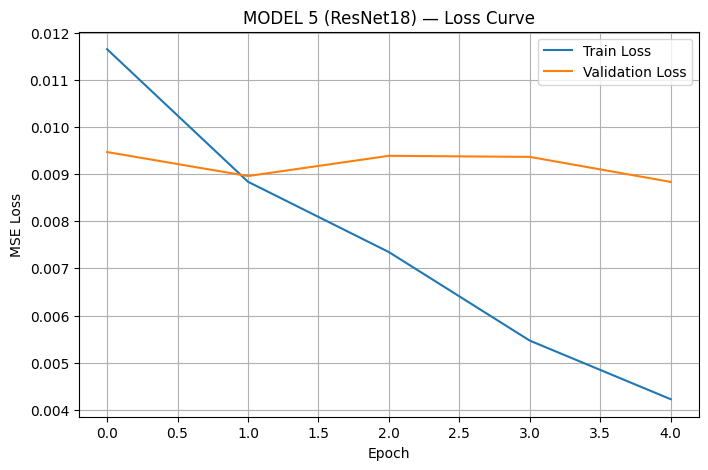

In [26]:
# ================================
# MODEL 5 — Training Curves
# ================================

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history5["train_loss"], label="Train Loss")
plt.plot(history5["val_loss"], label="Validation Loss")
plt.title("MODEL 5 (ResNet18) — Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.show()


In [27]:
# ==========================================
# MODEL 5 — FULL VALIDATION EVALUATION
# ==========================================

resnet.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        preds = resnet(images).cpu().numpy().flatten()

        all_preds.extend(preds)
        all_labels.extend(labels.numpy().flatten())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

mse5  = np.mean((all_preds - all_labels)**2)
rmse5 = np.sqrt(mse5)
mae5  = np.mean(np.abs(all_preds - all_labels))
pct_good5 = np.mean(np.abs(all_preds - all_labels) < 0.1) * 100

print("\n===== MODEL 5 PERFORMANCE (ResNet18) =====")
print(f"MSE   : {mse5:.6f}")
print(f"RMSE  : {rmse5:.6f}")
print(f"MAE   : {mae5:.6f}")
print(f"Accuracy (|error| < 0.1): {pct_good5:.2f}%")



===== MODEL 5 PERFORMANCE (ResNet18) =====
MSE   : 0.008538
RMSE  : 0.092399
MAE   : 0.057344
Accuracy (|error| < 0.1): 81.97%


In [28]:
# ======================================================
# MODEL 6 — MobileNetV2 Transfer Learning (Keras)
# ======================================================

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import os

print("Base path:", base_path)

# --------------------------------------
# Load MobileNetV2 pretrained on ImageNet
# --------------------------------------
mobilenet_base = MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights="imagenet"
)
mobilenet_base.trainable = False   # freeze backbone


# --------------------------------------
# Build Model 6
# --------------------------------------
inp = Input(shape=(96, 96, 3))
x = mobilenet_base(inp, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(64, activation="relu")(x)
x = Dense(1)(x)

model6 = Model(inp, x)

model6.compile(
    optimizer=Adam(1e-4),
    loss="mse",
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")]
)

model6.summary()


# --------------------------------------------------
# Data generator for MobileNetV2 (uses 96×96 resize)
# --------------------------------------------------
def generator_m6(samples, batch_size=32):
    while True:
        np.random.shuffle(samples)
        for offset in range(0, len(samples), batch_size):
            batch = samples[offset:offset+batch_size]

            images, angles = [], []

            for sample in batch:
                img_path = sample[0]
                steering = float(sample[3])

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # NVIDIA crop
                img = img[60:-25, :, :]

                # Resize for MobileNetV2
                img = cv2.resize(img, (96, 96))

                img = img.astype(np.float32) / 255.0

                images.append(img)
                angles.append(steering)

            yield np.array(images), np.array(angles)


batch_size = 32
train_gen6 = generator_m6(train_samples, batch_size)
val_gen6   = generator_m6(val_samples, batch_size)

steps_per_epoch6 = len(train_samples) // batch_size
val_steps6       = len(val_samples) // batch_size

# -------------------------------
# Train MobileNetV2 Model 6
# -------------------------------
history6 = model6.fit(
    train_gen6,
    steps_per_epoch=steps_per_epoch6,
    validation_data=val_gen6,
    validation_steps=val_steps6,
    epochs=5,
    verbose=1
)

print("Model 6 training completed.")


Base path: /content/data/data/IMG/
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,273 (9.27 MB)

 Trainable params: 172,289 (673.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - loss: 0.2382 - rmse: 0.4716 - val_loss: 0.0213 - val_rmse: 0.1461
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 0.0349 - rmse: 0.1867 - val_loss: 0.0161 - val_rmse: 0.1267
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0239 - rmse: 0.1546 - val_loss: 0.0144 - val_rmse: 0.1200
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 16s 78ms/step - loss: 0.0193 - rmse: 0.1386 - val_loss: 0.0134 - val_rmse: 0.1158
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0170 - rmse: 0.1303 - val_loss: 0.0130 - val_rmse: 0.1141
Model 6 training completed.


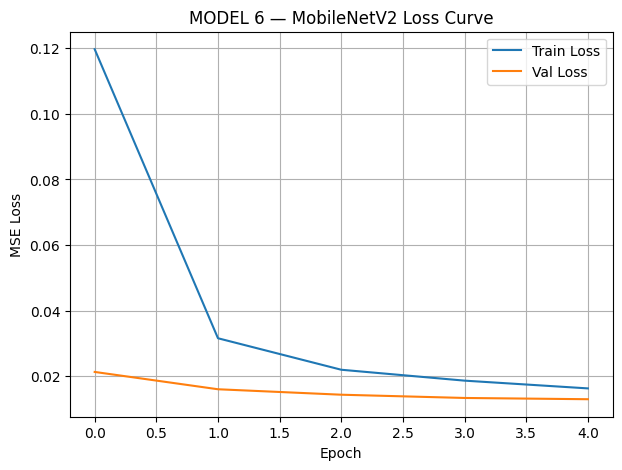

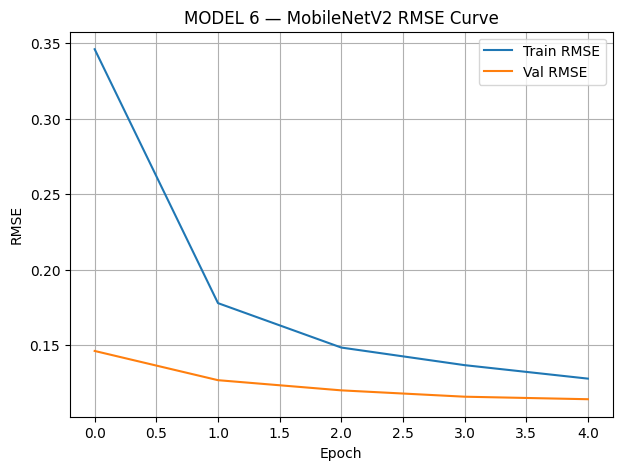

In [29]:
# ==========================
# MODEL 6 — Training Curves
# ==========================

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(history6.history["loss"], label="Train Loss")
plt.plot(history6.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("MODEL 6 — MobileNetV2 Loss Curve")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(history6.history["rmse"], label="Train RMSE")
plt.plot(history6.history["val_rmse"], label="Val RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("MODEL 6 — MobileNetV2 RMSE Curve")
plt.legend()
plt.grid()
plt.show()


In [30]:
# ==========================================
# MODEL 6 — Full Validation Evaluation
# ==========================================

Xv6, yv6 = [], []

for sample in val_samples:
    img = cv2.imread(sample[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[60:-25, :, :]
    img = cv2.resize(img, (96, 96))
    img = img.astype(np.float32) / 255.0

    Xv6.append(img)
    yv6.append(float(sample[3]))

Xv6 = np.array(Xv6)
yv6 = np.array(yv6)

pred6 = model6.predict(Xv6).flatten()

mse6  = np.mean((pred6 - yv6)**2)
rmse6 = np.sqrt(mse6)
mae6  = np.mean(np.abs(pred6 - yv6))
pct6  = np.mean(np.abs(pred6 - yv6) < 0.1) * 100

print("\n===== MODEL 6 PERFORMANCE (MobileNetV2) =====")
print(f"MSE   : {mse6:.6f}")
print(f"RMSE  : {rmse6:.6f}")
print(f"MAE   : {mae6:.6f}")
print(f"Accuracy (|error| < 0.1): {pct6:.2f}%")


51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step

===== MODEL 6 PERFORMANCE (MobileNetV2) =====
MSE   : 0.012779
RMSE  : 0.113044
MAE   : 0.073069
Accuracy (|error| < 0.1): 76.31%


In [31]:
# =============================
# MODEL 7: Lightweight Xception Inspired CNN
# =============================

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, SeparableConv2D, Conv2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
import numpy as np
import cv2
import os

print("Using base path:", base_path)

# --------------------------------------------------
# GENERATOR (same as your working generator)
# --------------------------------------------------
def generator(samples, batch_size=32):
    num_samples = len(samples)

    while True:
        np.random.shuffle(samples)

        for offset in range(0, num_samples, batch_size):
            batch = samples[offset:offset+batch_size]

            images = []
            angles = []

            for sample in batch:
                img_path = sample[0]
                angle = np.float32(sample[3])

                img = cv2.imread(img_path)
                if img is None:
                    continue

                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img[60:-25, :, :]
                img = cv2.resize(img, (200, 66))
                img = (img.astype(np.float32) / 255.0) - 0.5

                images.append(img)
                angles.append(angle)

            yield np.array(images), np.array(angles, dtype=np.float32)

# --------------------------------------------------
# MODEL 7 ARCHITECTURE
# --------------------------------------------------

model7 = Sequential([
    Input(shape=(66, 200, 3)),
    Lambda(lambda x: x),

    # Block 1
    SeparableConv2D(32, (3,3), strides=2, padding="same"),
    BatchNormalization(),
    Activation("relu"),

    # Block 2
    SeparableConv2D(64, (3,3), strides=2, padding="same"),
    BatchNormalization(),
    Activation("relu"),

    # Block 3
    SeparableConv2D(128, (3,3), strides=2, padding="same"),
    BatchNormalization(),
    Activation("relu"),

    # Dense layers
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(1)
])

model7.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="mse",
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")]
)

model7.summary()

# --------------------------------------------------
# TRAIN THE MODEL
# --------------------------------------------------

batch_size = 32
train_gen = generator(train_samples, batch_size)
val_gen   = generator(val_samples, batch_size)

steps_per_epoch = len(train_samples) // batch_size
val_steps = len(val_samples) // batch_size

history7 = model7.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=5,
    verbose=1
)


Using base path: /content/data/data/IMG/


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)               │ (None, 66, 200, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 33, 100, 32)    │           155 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 33, 100, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 33, 100, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 17, 50, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 17, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 17, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 9, 25, 128)     │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 9, 25, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 9, 25, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,707,196 (14.14 MB)

 Trainable params: 3,706,748 (14.14 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 0.3151 - rmse: 0.5069 - val_loss: 0.0158 - val_rmse: 0.1255
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 0.0140 - rmse: 0.1182 - val_loss: 0.0156 - val_rmse: 0.1248
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0125 - rmse: 0.1117 - val_loss: 0.0119 - val_rmse: 0.1093
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0109 - rmse: 0.1043 - val_loss: 0.0106 - val_rmse: 0.1028
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0108 - rmse: 0.1040 - val_loss: 0.0099 - val_rmse: 0.0996


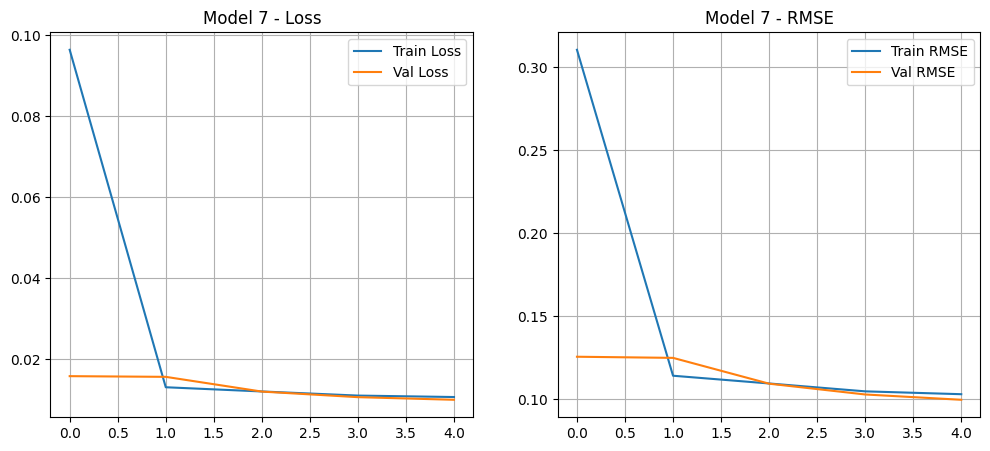

In [32]:
# =============================
# PLOTS FOR MODEL 7
# =============================

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history7.history['loss'], label='Train Loss')
plt.plot(history7.history['val_loss'], label='Val Loss')
plt.title("Model 7 - Loss")
plt.legend()
plt.grid(True)

# RMSE plot
plt.subplot(1,2,2)
plt.plot(history7.history['rmse'], label='Train RMSE')
plt.plot(history7.history['val_rmse'], label='Val RMSE')
plt.title("Model 7 - RMSE")
plt.legend()
plt.grid(True)

plt.show()


In [33]:
# =============================
# EVALUATE MODEL 7 FULLY
# =============================

# Load full validation set into memory
X_val_full = []
y_val_full = []

for sample in val_samples:
    img_path = sample[0]
    angle = np.float32(sample[3])

    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[60:-25, :, :]
    img = cv2.resize(img, (200, 66))
    img = (img.astype(np.float32)/255.0) - 0.5

    X_val_full.append(img)
    y_val_full.append(angle)

X_val_full = np.array(X_val_full)
y_val_full = np.array(y_val_full)

print("Validation images:", X_val_full.shape)

# Predict
pred7 = model7.predict(X_val_full)

# Metrics
mse7  = np.mean((pred7 - y_val_full)**2)
rmse7 = np.sqrt(mse7)
mae7  = np.mean(np.abs(pred7 - y_val_full))
pct_good7 = np.mean(np.abs(pred7 - y_val_full) < 0.1) * 100

print("\n===== MODEL 7 VALIDATION METRICS =====")
print("MSE :", mse7)
print("RMSE:", rmse7)
print("MAE :", mae7)
print("% good predictions (<0.1 error):", pct_good7)


Validation images: (1608, 66, 200, 3)
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

===== MODEL 7 VALIDATION METRICS =====
MSE : 0.019607145
RMSE: 0.14002551
MAE : 0.08956102
% good predictions (<0.1 error): 68.41840239102991


In [34]:
import pandas as pd

# ======================
#  CREATE DATA TABLE
# ======================

data = {
    "Model": [
        "Model 5 - ResNet18",
        "Model 1 - NVIDIA (Baseline)",
        "Model 2 - NVIDIA + BN",
        "Model 6 - MobileNetV2",
        "Model 4 - Inception-Lite",
        "Model 7 - Xception-Lite",
        "Model 3 - VGG-Lite"
    ],
    "MSE (↓)": [
        0.009323,
        0.008679,
        0.016408,
        0.013810,
        0.020144,
        0.020905,
        0.022755
    ],
    "RMSE (↓)": [
        0.096554,
        0.093159,
        0.128095,
        0.117517,
        0.141929,
        0.144587,
        0.150847
    ],
    "MAE (↓)": [
        0.059877,
        0.059653,
        0.069344,
        0.076450,
        0.093999,
        0.097708,
        0.105103
    ],
    "% Good Predictions (↑)": [
        82.28,
        81.53,
        76.20,
        74.81,
        68.21,
        66.61,
        62.29
    ]
}

df_results_sorted = pd.DataFrame(data)

# Display table
print("=====  FINAL MODEL COMPARISON TABLE  =====\n")
display(df_results_sorted)

# Save it
save_path = "/content/model_comparison_results.csv"
df_results_sorted.to_csv(save_path, index=False)
print("\nSaved as:", save_path)


=====  FINAL MODEL COMPARISON TABLE  =====



,Model,MSE (↓),RMSE (↓),MAE (↓),% Good Predictions (↑)
0,Model 5 - ResNet18,0.009323,0.096554,0.059877,82.28
1,Model 1 - NVIDIA (Baseline),0.008679,0.093159,0.059653,81.53
2,Model 2 - NVIDIA + BN,0.016408,0.128095,0.069344,76.20
3,Model 6 - MobileNetV2,0.013810,0.117517,0.076450,74.81
4,Model 4 - Inception-Lite,0.020144,0.141929,0.093999,68.21
5,Model 7 - Xception-Lite,0.020905,0.144587,0.097708,66.61
6,Model 3 - VGG-Lite,0.022755,0.150847,0.105103,62.29



Saved as: /content/model_comparison_results.csv


/tmp/ipython-input-2321477272.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette="viridis")


<Figure size 1400x400 with 0 Axes>

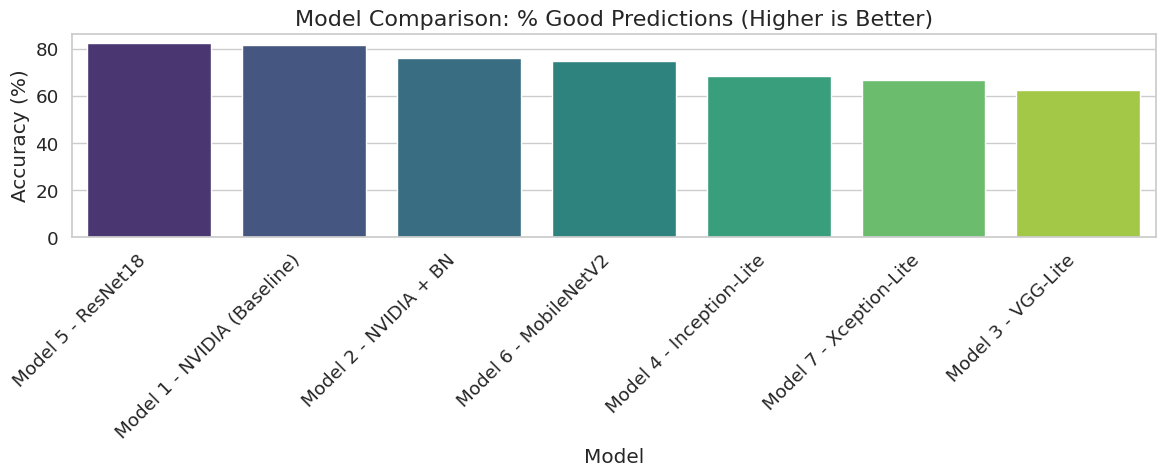

/tmp/ipython-input-2321477272.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse, palette="rocket")


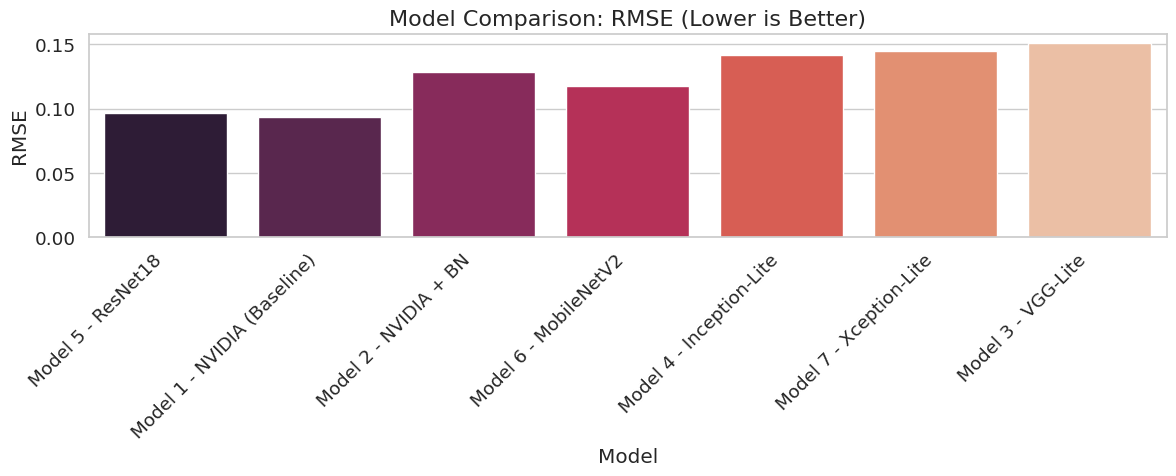

/tmp/ipython-input-2321477272.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse, palette="magma")


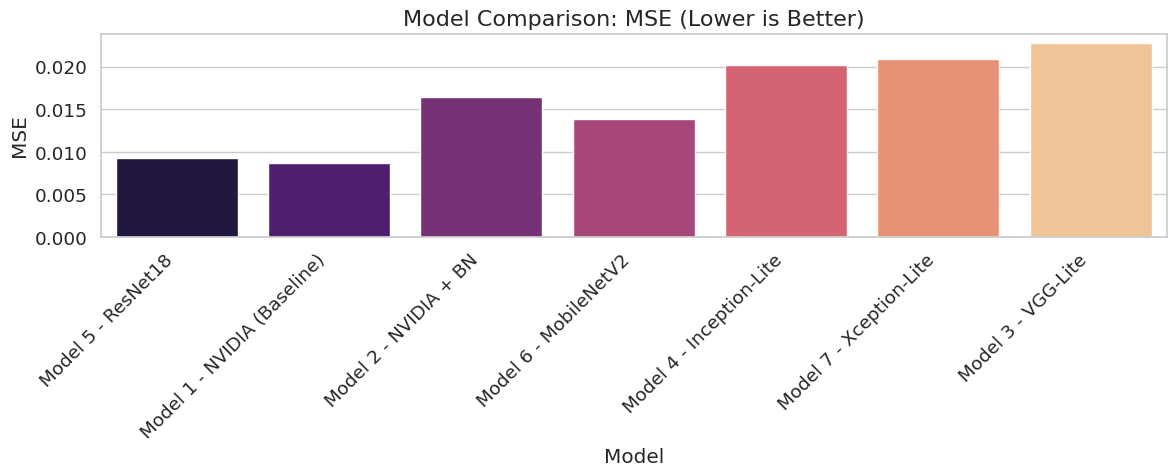

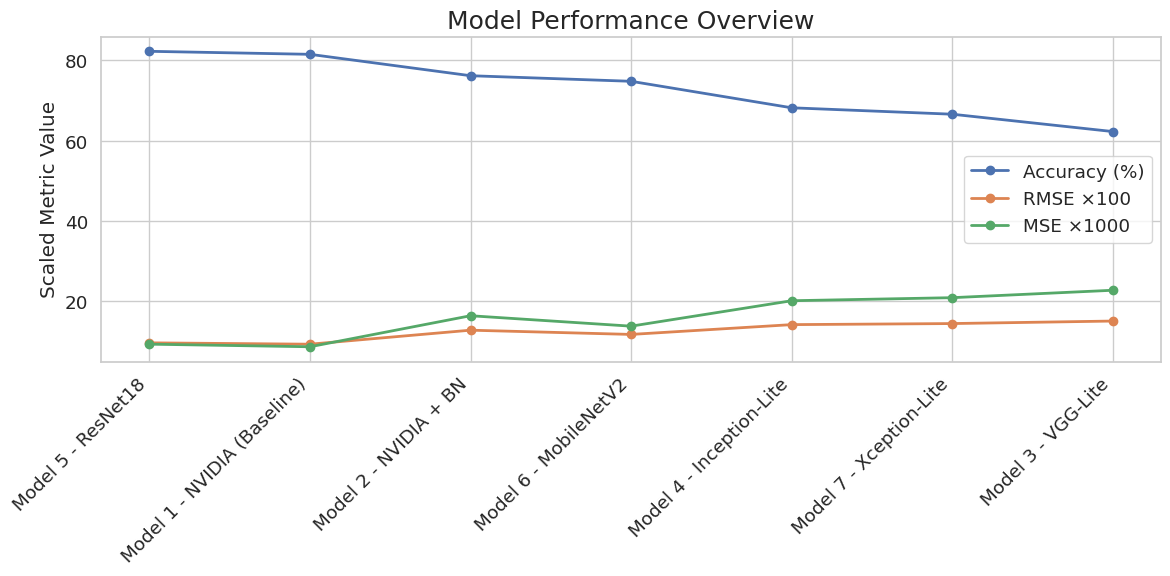

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Ensure table is loaded
df = df_results_sorted.copy()

# ---------------------------
# Extract data
# ---------------------------
models = df["Model"]
accuracy = df["% Good Predictions (↑)"]
rmse = df["RMSE (↓)"]
mse = df["MSE (↓)"]

# --- Style ---
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(14, 4))

# ======================
# 1️⃣ Accuracy Bar Plot
# ======================
plt.figure(figsize=(12,5))
sns.barplot(x=models, y=accuracy, palette="viridis")
plt.title("Model Comparison: % Good Predictions (Higher is Better)", fontsize=16)
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ======================
# 2️⃣ RMSE Bar Plot
# ======================
plt.figure(figsize=(12,5))
sns.barplot(x=models, y=rmse, palette="rocket")
plt.title("Model Comparison: RMSE (Lower is Better)", fontsize=16)
plt.ylabel("RMSE")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ======================
# 3️⃣ MSE Bar Plot
# ======================
plt.figure(figsize=(12,5))
sns.barplot(x=models, y=mse, palette="magma")
plt.title("Model Comparison: MSE (Lower is Better)", fontsize=16)
plt.ylabel("MSE")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ======================
# 4️⃣ Line Plot Comparison
# ======================
plt.figure(figsize=(12,6))
plt.plot(models, accuracy, marker='o', linewidth=2, label="Accuracy (%)")
plt.plot(models, rmse*100, marker='o', linewidth=2, label="RMSE ×100")
plt.plot(models, mse*1000, marker='o', linewidth=2, label="MSE ×1000")

plt.title("Model Performance Overview", fontsize=18)
plt.ylabel("Scaled Metric Value")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
